<a href="https://colab.research.google.com/github/AmoguJUduka/WirelessCommSys./blob/main/WirelessCommSys.HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

In [1]:
import math

# Function to calculate the LDR for different normalized envelope values
def N_r(f, r_lin):
    return math.sqrt(2 * math.pi) * f * r_lin * math.exp(-1 * (r_lin ** 2))

# Function to calculate the ADF for different normalized envelope values
def t_r(f, r_lin):
    return (math.exp(r_lin ** 2) - 1)/(math.sqrt(2 * math.pi) * f * r_lin)

# Function to calculate the linear values for the normalized envelope
def r_lin(r_dB):
    return math.sqrt(2) * (10 ** (r_dB/20))

# Function to calculate maximum dopple shift
def doppler_freq(fc, v, c):
    return v * fc/c

In [2]:
# r_db values
r_dB = [0, -3, -10, -15, -22]

# Linearized r_values
r = [r_lin(_) for _ in r_dB]

In [3]:
fc = 3.6e9
v = 8.33
c = 3e8

f = doppler_freq(fc, v, c)
print(f"The Maximum Doppler shift is {f} Hz")

The Maximum Doppler shift is 99.96 Hz


In [4]:
# Normalized LCR values
Nr = [N_r(f, _) for _ in r]
Nr

[47.95591874370966,
 92.06731536522241,
 91.7428617625022,
 59.15125790189485,
 27.79398082781527]

In [5]:
# Normalized ADF values
tr = [t_r(f, _) for _ in r]
tr

[0.018030406661259192,
 0.006875328532769593,
 0.0019758403372163807,
 0.0010361074431440233,
 0.0004511717625997736]

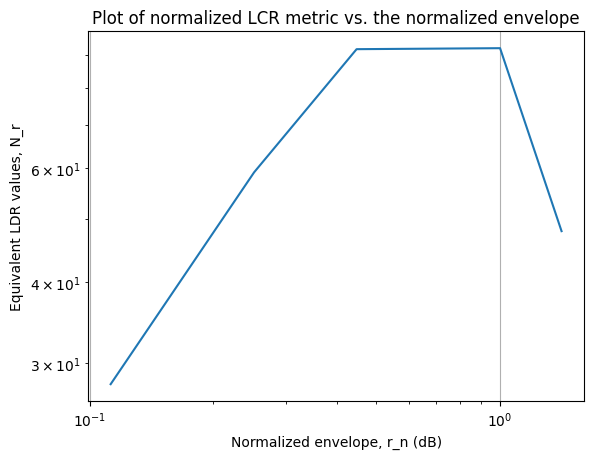

In [6]:
import matplotlib.pyplot as plt
plt.plot(r,Nr)
plt.xlabel("Normalized envelope, r_n (dB)")
plt.ylabel("Equivalent LDR values, N_r")
plt.xscale("log")
plt.yscale("log")
plt.title("Plot of normalized LCR metric vs. the normalized envelope")
plt.grid()
plt.show()

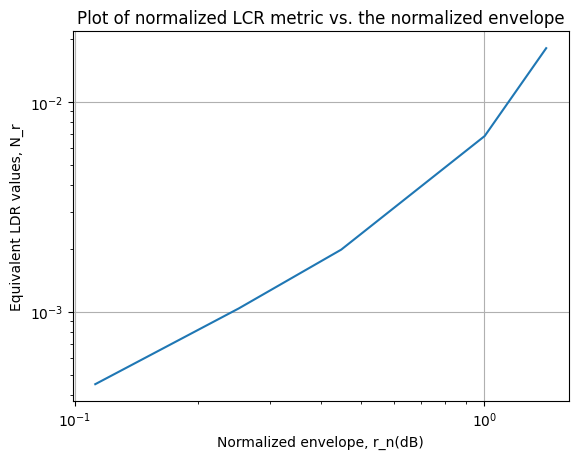

In [7]:
plt.plot(r,tr)
plt.xlabel("Normalized envelope, r_n(dB)")
plt.ylabel("Equivalent LDR values, N_r")
plt.xscale("log")
plt.yscale("log")
plt.title("Plot of normalized LCR metric vs. the normalized envelope")
plt.grid()
plt.show()

**Problem 3**

**The Simulator**

Defining of variables for the Simulator

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of sinusoids
N0 = int(N/4 - 1/2)  # Number of Doppler shifts
omega_d = 100 * 2 * np.pi  # Maximum Doppler shift in radians
T1 = 3.827e-3  # Time instance in seconds
T2 = 1e-3  # Time instance in seconds
num_samples = 40  # Number of samples to generate
tau1 = np.linspace(0, T1, num_samples)  # Time vector for tau
tau2 = np.linspace(0, T2, num_samples)  # Time vector for tau
alpha_k = np.array([ 2 * np.pi/N * k for k in range(N0 + 1)])
gamma_k = np.array([0.265352, 0.727255, 2.789171])
beta_k = np.array([k * np.pi * 1/(N0 + 1) for k in range(N0 + 1)])
omega_k = np.array([omega_d * np.cos(alpha_k)])


Defining the W(t) process

In [9]:
# Defining the BB Process
def w_s(t, omega_k, N0, gamma_k, beta_k):
    a = omega_k[0,1:]
    b = gamma_k[1:]
    c = beta_k[1:]

    d = np.sum(np.cos(a * t + b) * np.exp(1j * c)) + np.cos(omega_d  * t + gamma_k[0]) * np.exp(1j * beta_k[0])
    return 2 * np.sqrt(2) / np.sqrt(N) * d

In [10]:
# BB Samples
w_s_samples1 = np.array([w_s(t, omega_k, N0, gamma_k, beta_k) for t in tau1])
w_s_samples2 = np.array([w_s(t, omega_k, N0, gamma_k, beta_k) for t in tau2])

Expected Average Power of the Process

In [11]:
average_power1 = np.mean(np.abs(w_s_samples1)**2)
average_power2 = np.mean(np.abs(w_s_samples2)**2)

print(f"The average_power of the process (3.827ms) is: {average_power1:.2f}")
print(f"The average_power of the process (1ms) is: {average_power2:.2f}")

The average_power of the process (3.827ms) is: 1.68
The average_power of the process (1ms) is: 2.13


In [12]:
w_s_samples1

array([ 1.61691964-0.14836426j,  1.58845164-0.17972205j,
        1.55581822-0.21218785j,  1.51913168-0.24569088j,
        1.47851819-0.28015719j,  1.43411738-0.31550991j,
        1.38608184-0.35166933j,  1.33457665-0.38855321j,
        1.27977875-0.42607689j,  1.22187637-0.46415356j,
        1.16106835-0.50269443j,  1.09756347-0.54160897j,
        1.03157972-0.58080516j,  0.96334352-0.62018964j,
        0.89308895-0.65966803j,  0.82105693-0.6991451j ,
        0.74749435-0.73852503j,  0.67265323-0.77771166j,
        0.59678983-0.81660869j,  0.52016373-0.85511997j,
        0.44303695-0.89314969j,  0.36567299-0.93060266j,
        0.28833591-0.96738452j,  0.21128943-1.00340196j,
        0.13479597-1.03856301j,  0.05911571-1.07277722j,
       -0.01549429-1.10595591j, -0.08878102-1.13801235j,
       -0.16049642-1.16886207j, -0.23039824-1.19842295j,
       -0.29825092-1.22661553j, -0.36382637-1.25336315j,
       -0.42690485-1.27859216j, -0.48727569-1.30223213j,
       -0.54473806-1.32421597j,

In [13]:
w_s_samples2

array([1.61691964-0.14836426j, 1.60988866-0.15644732j,
       1.60256816-0.16460948j, 1.59495986-0.17284953j,
       1.58706554-0.18116628j, 1.57888707-0.18955848j,
       1.57042636-0.19802489j, 1.5616854 -0.20656426j,
       1.55266625-0.2151753j , 1.54337103-0.22385673j,
       1.53380192-0.23260725j, 1.52396116-0.24142554j,
       1.51385108-0.25031025j, 1.50347403-0.25926006j,
       1.49283247-0.26827359j, 1.48192888-0.27734948j,
       1.47076583-0.28648633j, 1.45934595-0.29568275j,
       1.4476719 -0.30493732j, 1.43574643-0.31424861j,
       1.42357234-0.3236152j , 1.41115248-0.33303563j,
       1.39848978-0.34250843j, 1.3855872 -0.35203215j,
       1.37244777-0.36160528j, 1.35907457-0.37122633j,
       1.34547075-0.38089381j, 1.33163948-0.39060618j,
       1.31758403-0.40036193j, 1.30330769-0.41015951j,
       1.28881379-0.41999739j, 1.27410576-0.42987399j,
       1.25918703-0.43978776j, 1.2440611 -0.44973711j,
       1.22873153-0.45972047j, 1.2132019 -0.46973625j,
       1.1

In [14]:
def autocorrelation(x):
  """Computes the autocorrelation of a signal."""
  n = len(x)
  variance = np.var(x)
  correlation = np.correlate(x, x, mode='full')
  return correlation[n - 1:] / variance

autocorrelation_ws_samples1 = autocorrelation(w_s_samples1)



In [15]:
np.mean(autocorrelation_ws_samples1)

(25.137170722149804-25.676903270715588j)

In [16]:
normalized_w_s1 = w_s_samples1 / np.sqrt(average_power1)
normalized_w_s1

array([ 1.24850001-0.11455905j,  1.22651853-0.13877188j,
        1.20132072-0.16384026j,  1.17299332-0.18970953j,
        1.14163372-0.2163226j ,  1.10734976-0.2436201j ,
        1.07025925-0.2715405j ,  1.03048966-0.30002028j,
        0.98817761-0.32899409j,  0.94346845-0.35839488j,
        0.8965157 -0.38815411j,  0.84748059-0.41820187j,
        0.79653142-0.44846709j,  0.74384303-0.47887771j,
        0.68959616-0.50936084j,  0.63397683-0.53984295j,
        0.57717569-0.57025005j,  0.51938733-0.6005079j ,
        0.46080961-0.63054214j,  0.40164298-0.66027851j,
        0.34208975-0.68964306j,  0.28235338-0.71856227j,
        0.22263777-0.74696327j,  0.16314655-0.77477404j,
        0.10408233-0.80192355j,  0.04564603-0.82834196j,
       -0.01196387-0.85396078j, -0.06855202-0.87871308j,
       -0.12392686-0.9025336j , -0.17790136-0.92535896j,
       -0.23029362-0.94712778j, -0.28092752-0.96778088j,
       -0.3296334 -0.98726139j, -0.37624858-1.00551493j,
       -0.42061798-1.02248969j,

In [17]:
normalized_w_s2 = w_s_samples2 / np.sqrt(average_power2)
normalized_w_s2

array([1.1072203 -0.1015956j , 1.10240569-0.10713065j,
       1.09739282-0.11271986j, 1.09218287-0.11836242j,
       1.08677707-0.12405748j, 1.08117669-0.12980422j,
       1.07538303-0.13560178j, 1.06939748-0.14144929j,
       1.06322142-0.14734589j, 1.05685632-0.15329069j,
       1.05030367-0.15928279j, 1.043565  -0.1653213j ,
       1.0366419 -0.1714053j , 1.029536  -0.17753387j,
       1.02224896-0.18370608j, 1.0147825 -0.18992099j,
       1.00713836-0.19617764j, 0.99931835-0.20247508j,
       0.99132429-0.20881235j, 0.98315807-0.21518846j,
       0.9748216 -0.22160243j, 0.96631684-0.22805327j,
       0.95764579-0.23453998j, 0.94881047-0.24106154j,
       0.93981296-0.24761695j, 0.93065538-0.25420517j,
       0.92133987-0.26082518j, 0.91186862-0.26747594j,
       0.90224385-0.27415639j, 0.89246781-0.2808655j ,
       0.88254281-0.28760219j, 0.87247117-0.29436541j,
       0.86225525-0.30115407j, 0.85189745-0.30796711j,
       0.84140019-0.31480343j, 0.83076595-0.32166194j,
       0.8

Implementation of the Autocorrelation

In [18]:
# Autocorrelation function
def autocorrelation(omega_k, omega_d, N, t):
    """
    Calculates the autocorrelation.

    Args:
        omega_k: The omega_k values.
        omega_d: The omega_d value.
        N: The N value.
        t: The time variable.

    Returns:
        The autocorrelation value.
    """
    a = omega_k[0,1:]
    # Reshape 'a' to (2, 1) to enable broadcasting with 't' (40,)
    # Resulting shape of 'a * t' will be (2, 40)
    b = 2 * np.sum(np.cos(a.reshape(-1, 1) * t), axis=0) + omega_d * t
    return 4/N * b

In [19]:
autocorrelation_values1 = autocorrelation(omega_k, omega_d, N, tau1)
autocorrelation_values2 = autocorrelation(omega_k, omega_d, N, tau2)

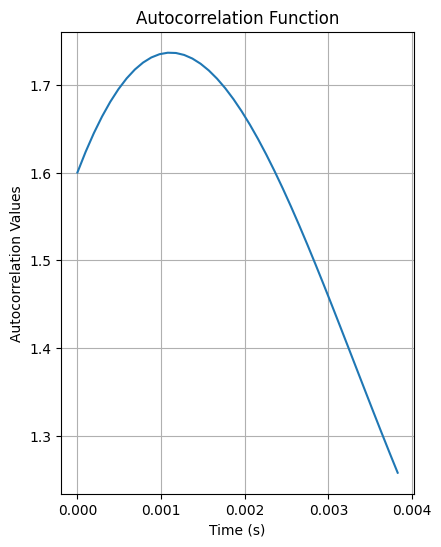

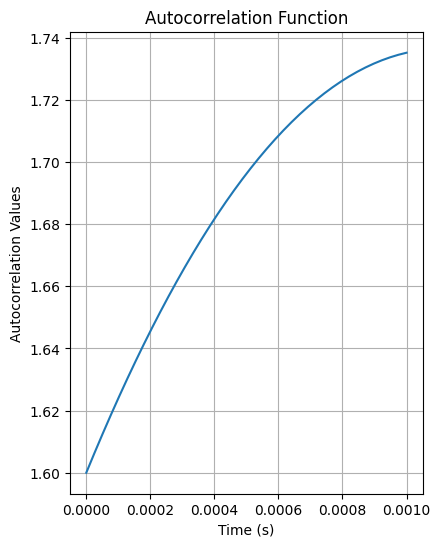

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(tau1, autocorrelation_values1)
plt.title("Autocorrelation Function")
plt.xlabel("Time (s)")
plt.ylabel("Autocorrelation Values")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.plot(tau2, autocorrelation_values2)
plt.title("Autocorrelation Function")
plt.xlabel("Time (s)")
plt.ylabel("Autocorrelation Values")
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

Implementation of C_k and S_k

In [21]:
def C_k(beta_k):
  return 4/np.sqrt(N) * np.cos(beta_k)


def S_k(beta_k):
  return 4/np.sqrt(N) * np.sin(beta_k)


C_0 = 0
S_0 = 0

In [22]:
C_k_values = C_k(beta_k)
S_k_values = S_k(beta_k)

In [23]:
C_k_values

array([ 1.26491106,  0.63245553, -0.63245553])

In [24]:
S_k_values

array([0.        , 1.09544512, 1.09544512])

Visualization for the 40 samples (Real and Imaginary)

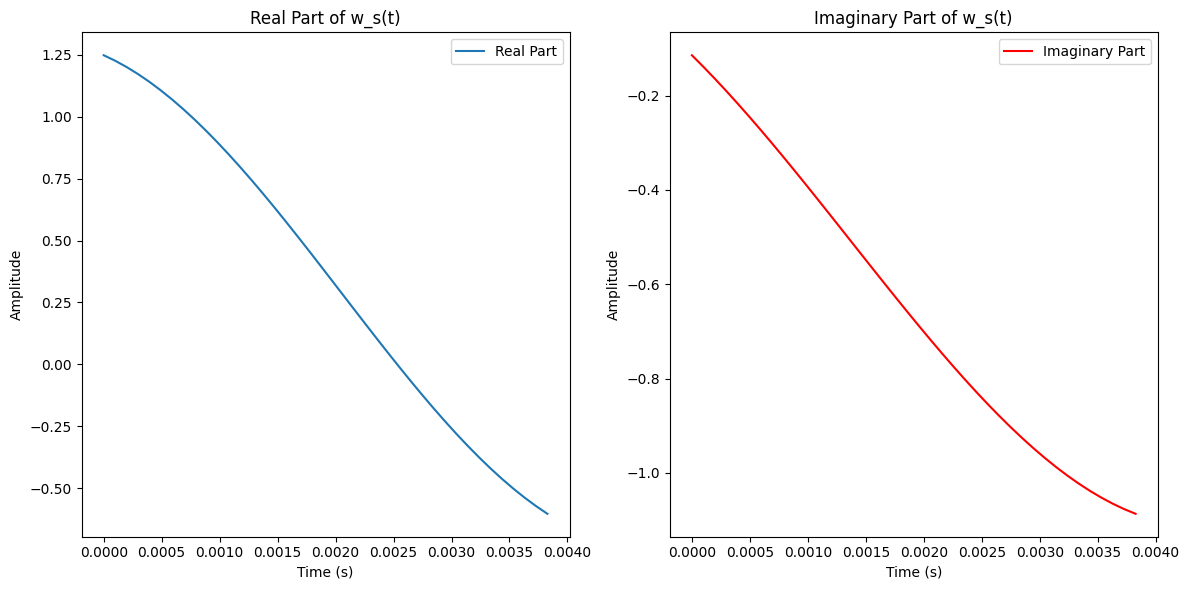

In [25]:
# Plot the real and imaginary parts of the process
plt.figure(figsize=(12, 6))

# Plot real part
plt.subplot(1, 2, 1)
plt.plot(tau1, normalized_w_s1.real, label="Real Part")
plt.title("Real Part of w_s(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.plot(tau1, normalized_w_s1.imag, label="Imaginary Part", color="r")
plt.title("Imaginary Part of w_s(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


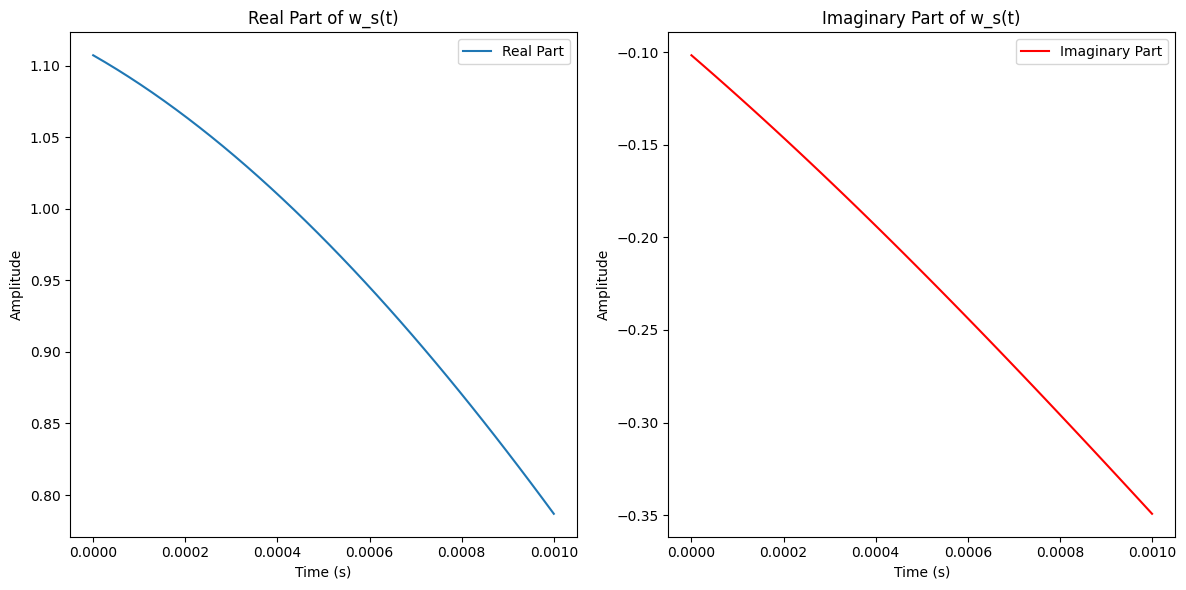

In [26]:
# Plot the real and imaginary parts of the process
plt.figure(figsize=(12, 6))

# Plot real part
plt.subplot(1, 2, 1)
plt.plot(tau2, normalized_w_s2.real, label="Real Part")
plt.title("Real Part of w_s(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.plot(tau2, normalized_w_s2.imag, label="Imaginary Part", color="r")
plt.title("Imaginary Part of w_s(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

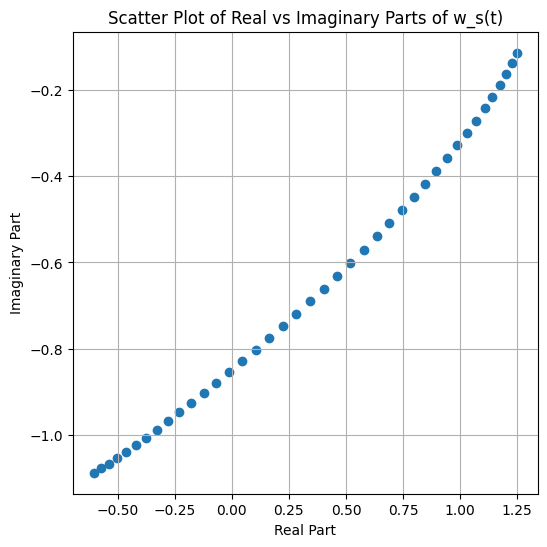

In [27]:
# Scatter plot of real vs imaginary parts
plt.figure(figsize=(6, 6))
plt.scatter(normalized_w_s1.real, normalized_w_s1.imag)
plt.title("Scatter Plot of Real vs Imaginary Parts of w_s(t)")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True)
plt.show()

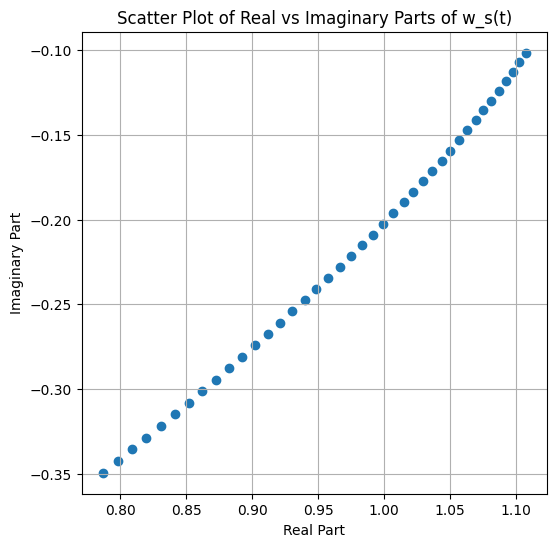

In [28]:
# Scatter plot of real vs imaginary parts
plt.figure(figsize=(6, 6))
plt.scatter(normalized_w_s2.real, normalized_w_s2.imag)
plt.title("Scatter Plot of Real vs Imaginary Parts of w_s(t)")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True)
plt.show()

Expected Time Averages

In [29]:
def u2(N, beta_k):
    return 1 + 4/N * (1/2 * np.cos(2 * beta_k[0] + np.sum(np.cos(2 * beta_k))))

def v2(N, beta_k):
    return 1 - 4/N * (1/2 * np.cos(2 * beta_k[0] + np.sum(np.cos(2 * beta_k))))

def uv(N, beta_k):
    return 1/N * (1/2 * np.sin(2 * beta_k[0] + np.sum(np.sin(2 * beta_k))))

In [30]:
u2_values = u2(N, beta_k)
v2_values = v2(N, beta_k)
uv_values = uv(N, beta_k)

In [31]:
u2_values

1.2

In [32]:
v2_values

0.8

In [33]:
uv_values

1.665334536937735e-17

In [34]:
# Calculate the variance of the real and imaginary parts
variance_real1 = np.var(normalized_w_s1.real)
variance_imag1 = np.var(normalized_w_s1.imag)

# Calculate the correlation between the real and imaginary parts
correlation1 = np.corrcoef(normalized_w_s1.real, normalized_w_s1.imag)[0, 1]

print(f"Variance of real part (3.827ms): {variance_real1:.4f}")
print(f"Variance of imaginary part (3.827ms): {variance_imag1:.4f}")
print(f"Correlation between real and imaginary parts (3.827ms): {correlation1:.4f}")

# Calculate the variance of the real and imaginary parts
variance_real2 = np.var(normalized_w_s2.real)
variance_imag2 = np.var(normalized_w_s2.imag)

# Calculate the correlation between the real and imaginary parts
correlation2 = np.corrcoef(normalized_w_s2.real, normalized_w_s2.imag)[0, 1]

print(f"Variance of real part (1ms): {variance_real2:.4f}")
print(f"Variance of imaginary part (1ms): {variance_imag2:.4f}")
print(f"Correlation between real and imaginary parts (1ms): {correlation2:.4f}")


Variance of real part (3.827ms): 0.3596
Variance of imaginary part (3.827ms): 0.0946
Correlation between real and imaginary parts (3.827ms): 0.9946
Variance of real part (1ms): 0.0092
Variance of imaginary part (1ms): 0.0054
Correlation between real and imaginary parts (1ms): 0.9972


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


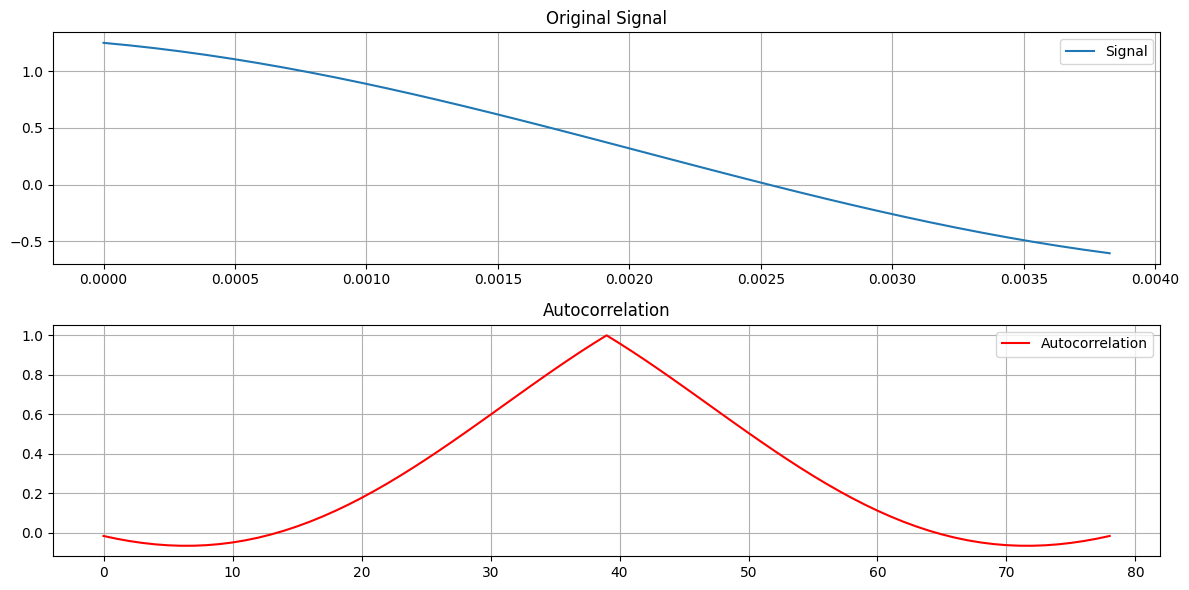

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Example signal (you can replace this with your actual signal)
t = tau1
#x = np.cos( 2 * np.pi * f * t)  # Replace with your signal data
x = normalized_w_s1

# Compute the autocorrelation using numpy.correlate
autocorr = np.correlate(x, x, mode='full')  # Full mode to get both positive and negative lags

# Normalize the autocorrelation
autocorr = autocorr / np.max(autocorr)

# Keep only the second half (positive lags)
#autocorr = autocorr[autocorr.size // 2:]

# Plot the signal and its autocorrelation
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tau1, x, label="Signal")
plt.title('Original Signal')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(autocorr, label="Autocorrelation", color='r')
plt.title('Autocorrelation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
